# **1.Single Perceptron**

In [ ]:
import numpy as np
import pandas as pd
import math

X = np.array ([ 0.5, 0.6 , 0.9])
W=np.array ([0.2, 0.3, 0.1] )
b = 0.5
def stepfunction(t):
    if t>0:
       return 1
    else:
       return 0
def prediction (X, W, b):
    return stepfunction((np.matmul(X,W)+b))

print(prediction (X, W, b ))

1


# **2.Implementation of perceptron model in AND gate**

In [ ]:
import numpy as np
import random
import sys

and_gate = [
    [(1, 1), 1],
    [(1, -1), -1],
    [(-1, 1), -1],
    [(-1, -1), -1]
]

or_gate = [
    [(1, 1), 1],
    [(1, -1), 1],
    [(-1, 1), 1],
    [(-1, -1), -1]
]


def activation_function(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
def run_perceptron(gate):
    bias = (1,)
    learning_constant = 0.1
    n = 50
    weights = []
    for i in range(3):
        weights.append(random.uniform(-1, 1))

    for i in range(n):
        inputs, expected_output = random.choice(gate)
        inputs = inputs + bias
        weighted_sum = np.dot(inputs, weights)
        guess = activation_function(weighted_sum)
        error = expected_output - guess
        weights += learning_constant * error * np.asarray(inputs)
    inputs, expected_output = random.choice(gate)
    print("inputs: " + str(inputs))
    inputs = inputs + bias
    weighted_sum = np.dot(inputs, weights)
    print("weighted sum: " + str(weighted_sum))
    print("correct answer: " + str(expected_output))
    print("perceptron guess: " + str(activation_function(weighted_sum)) + '\n')

tests=2
for i in range(tests):
    print("// AND //")
    run_perceptron(and_gate)

    print("// OR //")
    run_perceptron(or_gate)

// AND //
inputs: (1, -1)
weighted sum: -0.3092306309321265
correct answer: -1
perceptron guess: -1

// OR //
inputs: (1, -1)
weighted sum: 1.2460126313467053
correct answer: 1
perceptron guess: 1

// AND //
inputs: (-1, 1)
weighted sum: -0.1740176807277276
correct answer: -1
perceptron guess: -1

// OR //
inputs: (1, 1)
weighted sum: 1.3955594714909192
correct answer: 1
perceptron guess: 1



## **3.Simple neural networks**

In [ ]:
import numpy as np
class NeuralNetwork():
    def __init__(self):
        np.random.seed(1)

        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):


        for iteration in range(training_iterations):

            output = self.think(training_inputs)
            error = training_outputs - output
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments

    def think(self, inputs):
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


In [ ]:
if __name__ == "__main__":
  neural_network = NeuralNetwork()
  print("Random starting synaptic weights: ")
  print(neural_network.synaptic_weights)
  training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
  training_set_outputs = array([[0, 1, 1, 0]]).T

  neural_network.train(training_set_inputs, training_set_outputs, 10000)
  print("New synaptic weights after training: ")
  print(neural_network.synaptic_weights)

  print("Considering new situation [1, 0, 0] -> ?: ")
  print(neural_network.think(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]


# **4.Multi-layered neural networks**

In [ ]:
from numpy import exp, array, random, dot

In [ ]:
class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1

In [ ]:
class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2


    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

            layer2_error = training_set_outputs - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment

    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2

    def print_weights(self):
        print("    Layer 1 (4 neurons, each with 3 inputs): ")
        print(self.layer1.synaptic_weights)
        print("    Layer 2 (1 neuron, with 4 inputs):")
        print(self.layer2.synaptic_weights)

In [ ]:
if __name__ == "__main__":

    random.seed(1)

    layer1 = NeuronLayer(4, 3)
    layer2 = NeuronLayer(1, 4)
    neural_network = NeuralNetwork(layer1, layer2)

    print ("Stage 1) Random starting synaptic weights: ")
    neural_network.print_weights()

    training_set_inputs = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]])
    training_set_outputs = array([[0, 1, 1, 1, 1, 0, 0]]).T

    neural_network.train(training_set_inputs, training_set_outputs, 60000)

    print("Stage 2- New synaptic weights after training: ")
    neural_network.print_weights()

    print("Stage 3- Considering a new situation [1, 1, 0] -> ?: ")
    hidden_state, output = neural_network.think(array([1, 1, 0]))
    print(output)

Stage 1) Random starting synaptic weights: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
    Layer 2 (1 neuron, with 4 inputs):
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Stage 2- New synaptic weights after training: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[ 0.3122465   4.57704063 -6.15329916 -8.75834924]
 [ 0.19676933 -8.74975548 -6.1638187   4.40720501]
 [-0.03327074 -0.58272995  0.08319184 -0.39787635]]
    Layer 2 (1 neuron, with 4 inputs):
[[ -8.18850925]
 [ 10.13210706]
 [-21.33532796]
 [  9.90935111]]
Stage 3- Considering a new situation [1, 1, 0] -> ?: 
[0.0078876]


# ***5.Back_Propagation***

In [ ]:
from math import exp
from random import seed
from random import random

In [ ]:

def initialize_network(n_inputs, n_hidden, n_outputs):
 network = list()
 hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
 network.append(hidden_layer)
 output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
 network.append(output_layer)
 return network

In [ ]:

def activate(weights, inputs):
 activation = weights[-1]
 for i in range(len(weights)-1):
   activation += weights[i] * inputs[i]
 return activation

In [ ]:

def transfer(activation):
 return 1.0 / (1.0 + exp(-activation))

In [ ]:

def forward_propagate(network, row):
 inputs = row
 for layer in network:
  new_inputs = []
  for neuron in layer:
    activation = activate(neuron['weights'], inputs)
    neuron['output'] = transfer(activation)
    new_inputs.append(neuron['output'])
  inputs = new_inputs
 return inputs

In [ ]:

def transfer_derivative(output):
 return output * (1.0 - output)

In [ ]:

def backward_propagate_error(network, expected):
 for i in reversed(range(len(network))):
  layer = network[i]
  errors = list()

  if i != len(network)-1:
    for j in range(len(layer)):
      error = 0.0
    for neuron in network[i + 1]:
      error += (neuron['weights'][j] * neuron['delta'])
      errors.append(error)
  else:
    for j in range(len(layer)):
      neuron = layer[j]
      errors.append(neuron['output'] - expected[j])
  for j in range(len(layer)):
    neuron = layer[j]
    neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [ ]:

def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:

def train_network(network, train, l_rate, n_epoch, n_outputs):

    print("\n Network Training Begins:\n")

    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

    print("\n Network Training Ends:\n")

In [ ]:

seed(2)
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

print("\n The input Data Set :\n",dataset)
n_inputs = len(dataset[0]) - 1
print("\n Number of Inputs :\n",n_inputs)
n_outputs = len(set([row[-1] for row in dataset]))
print("\n Number of Outputs :\n",n_outputs)


 The input Data Set :
 [[2.7810836, 2.550537003, 0], [1.465489372, 2.362125076, 0], [3.396561688, 4.400293529, 0], [1.38807019, 1.850220317, 0], [3.06407232, 3.005305973, 0], [7.627531214, 2.759262235, 1], [5.332441248, 2.088626775, 1], [6.922596716, 1.77106367, 1], [8.675418651, -0.242068655, 1], [7.673756466, 3.508563011, 1]]

 Number of Inputs :
 2

 Number of Outputs :
 2


In [ ]:
#Network Initialization
network = initialize_network(n_inputs, 2, n_outputs)

# Training the Network
train_network(network, dataset, 0.5, 20, n_outputs)
print("\n Final Neural Network :")

i= 1
for layer in network:
    j=1
    for sub in layer:
        print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
        j=j+1
    i=i+1


 Network Training Begins:

>epoch=0, lrate=0.500, error=7.317
>epoch=1, lrate=0.500, error=8.334
>epoch=2, lrate=0.500, error=8.867
>epoch=3, lrate=0.500, error=9.161
>epoch=4, lrate=0.500, error=9.341
>epoch=5, lrate=0.500, error=9.460
>epoch=6, lrate=0.500, error=9.544
>epoch=7, lrate=0.500, error=9.606
>epoch=8, lrate=0.500, error=9.654
>epoch=9, lrate=0.500, error=9.691
>epoch=10, lrate=0.500, error=9.722
>epoch=11, lrate=0.500, error=9.747
>epoch=12, lrate=0.500, error=9.768
>epoch=13, lrate=0.500, error=9.785
>epoch=14, lrate=0.500, error=9.801
>epoch=15, lrate=0.500, error=9.814
>epoch=16, lrate=0.500, error=9.826
>epoch=17, lrate=0.500, error=9.836
>epoch=18, lrate=0.500, error=9.845
>epoch=19, lrate=0.500, error=9.854

 Network Training Ends:


 Final Neural Network :

 Layer[1] Node[1]:
 {'weights': [0.9564917906946954, 0.9464316011967685, 0.055967744595817596], 'output': 0.9999778236038537, 'delta': 2.1668026752840196e-07}

 Layer[1] Node[2]:
 {'weights': [0.335818077048993

# ***Predicting_Car_Purchase_FNN_Using_Regression***

In [2]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
data = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [5]:
data.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   JobTitle             500 non-null    object 
 2   customer e-mail      500 non-null    object 
 3   country              500 non-null    object 
 4   gender               500 non-null    int64  
 5   age                  500 non-null    int64  
 6   BasePay              500 non-null    float64
 7   OvertimePay          500 non-null    float64
 8   OtherPay             500 non-null    float64
 9   Benefits             0 non-null      float64
 10  TotalPay             500 non-null    float64
 11  TotalPayBenefits     500 non-null    float64
 12  credit card debt     500 non-null    float64
 13  net worth            500 non-null    float64
 14  car purchase amount  500 non-null    float64
dtypes: float64(9), int64(2), object(4)
memor

In [7]:
data.corr()[["car purchase amount"]].sort_values(["car purchase amount"])



,car purchase amount
gender,-0.066408
OvertimePay,-0.031566
OtherPay,-0.008536
TotalPay,0.006014
TotalPayBenefits,0.006014
credit card debt,0.028882
BasePay,0.037602
net worth,0.488580
age,0.633273
car purchase amount,1.000000


In [8]:
data.isna().sum()

customer name            0
JobTitle                 0
customer e-mail          0
country                  0
gender                   0
age                      0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits               500
TotalPay                 0
TotalPayBenefits         0
credit card debt         0
net worth                0
car purchase amount      0
dtype: int64

In [9]:
car_df = data.drop(["customer name","customer e-mail","country","JobTitle","Benefits"],axis=1)


In [10]:
Y = car_df[["car purchase amount"]]
X = car_df.drop(["car purchase amount"],axis=1)
print(X.shape,Y.shape)


(500, 9) (500, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
Y_scaled = mms.fit_transform(Y.values.reshape(-1,1))


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)

In [13]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)


(375, 9) (375, 1) (125, 9) (125, 1)


In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest)*100)

45.52010579187809


In [16]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim=9, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                250       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 926 (3.62 KB)
Trainable params: 926 (3.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')
epochs_hist = model.fit(xtrain,ytrain,epochs=10,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 1s 39ms/step - loss: 0.2080 - val_loss: 0.1332
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0964 - val_loss: 0.0543
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.0284
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0278 - val_loss: 0.0318
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0325 - val_loss: 0.0313
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0285 - val_loss: 0.0247
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0225 - val_loss: 0.0213
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0203 - val_loss: 0.0205
Epoch 9/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0194 - val_loss: 0.0190
Epoch 10/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0176 - val_loss: 0.0167


In [18]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

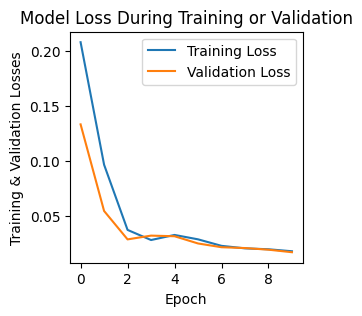

In [19]:
plt.figure(figsize=(3,3),dpi=100)
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])


In [20]:
X_random_sample = np.array([[0,42,167411.18,0,400184.25,567595.43,567595.43,11609.38091,238961.2505]])
y_predict = model.predict(X_random_sample)

1/1 [==============================] - 0s 141ms/step


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
def performance(model,X_train,y_train,y_pred,y_test):
    print('Train Score:',model.score(xtrain,ytrain))
    print('Test Score:',r2_score(ytest,y_pred))
    print('')
    print('MSE:',mean_squared_error(ytest,y_pred))
    print('MAE:',mean_absolute_error(ytest,y_pred))


In [24]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)


lr_pred = lr.predict(xtest)
performance(lr,xtrain,ytrain,lr_pred,ytest)

Train Score: 0.666373022883424
Test Score: 0.4833359479160346

MSE: 0.010542845566519393
MAE: 0.08267223296769366


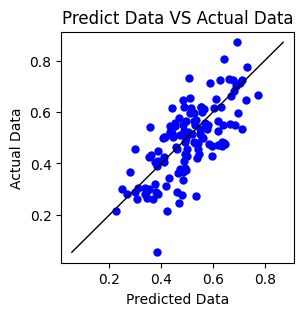

In [25]:
plt.figure(figsize=(3,3),dpi=100)
plt.scatter(lr_pred,ytest,c='blue',marker='o',s=25)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],c='black',lw=1)

plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Predict Data VS Actual Data')
plt.show()

In [26]:
ridge = Ridge(alpha = 1)
ridge.fit(xtrain,ytrain)

ridge_pred = ridge.predict(xtest)
performance(ridge,xtrain,ytrain,ridge_pred,ytest)

Train Score: 0.6614677775077044
Test Score: 0.49423458296133316

MSE: 0.010320452261421083
MAE: 0.08219794340251466


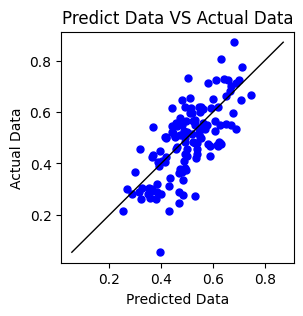

In [27]:
plt.figure(figsize=(3,3),dpi=100)
plt.scatter(ridge_pred,ytest,c='blue',marker='o',s=25)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],c='black',lw=1)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Predict Data VS Actual Data')
plt.show()
